In [2]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Part b

Question 1

In [3]:
df = pd.read_csv('CustomerData.csv')

In [4]:
df.head()

,customer_id,name,gender,age,annual income (lakhs),spending score,items purchased (monthly),country,category,purchase type
0,1,Edith,Female,NaN,40.9,27,62,Iran,Baby,offline
1,2,Sinclair,Male,53.0,NaN,42,47,China,NaN,online
2,3,Enoch,Male,22.0,NaN,70,26,China,Computers,offline
3,4,Lorenzo,Male,9.0,18.5,68,80,Russia,NaN,online
4,5,Damian,Male,55.0,18.4,69,89,Philippines,Jewelery,offline


# Data Preprocessing

Handle missing values

In [5]:
df.isnull().sum() 

customer_id                   0
name                          0
gender                       10
age                           5
annual income (lakhs)         8
spending score                0
items purchased (monthly)     0
country                       0
category                     13
purchase type                 0
dtype: int64

In [6]:
df.gender.fillna(df.gender.mode()[0], inplace = True)

In [7]:
df.category.fillna(df.category.mode()[0], inplace = True)

In [8]:
df.age.fillna(int(df.age.mean()), inplace = True)

In [9]:
df['annual income (lakhs)'].fillna(df['annual income (lakhs)'].mean(), inplace = True)

In [10]:
df.isnull().sum() 

customer_id                  0
name                         0
gender                       0
age                          0
annual income (lakhs)        0
spending score               0
items purchased (monthly)    0
country                      0
category                     0
purchase type                0
dtype: int64

## Data Transformation

Encode categorical values to numerical values

In [11]:
encoder = preprocessing.LabelEncoder()
df[['category', 'purchase type ', 'gender']] = df[['category', 'purchase type ', 'gender']].apply(encoder.fit_transform)

In [12]:
df.head()

,customer_id,name,gender,age,annual income (lakhs),spending score,items purchased (monthly),country,category,purchase type
0,1,Edith,0,29.0,40.900000,27,62,Iran,1,0
1,2,Sinclair,1,53.0,35.578846,42,47,China,2,1
2,3,Enoch,1,22.0,35.578846,70,26,China,5,0
3,4,Lorenzo,1,9.0,18.500000,68,80,Russia,2,1
4,5,Damian,1,55.0,18.400000,69,89,Philippines,12,0


Binning ages into child, teenager, adult, middle aged, old aged

In [22]:
df['age group'] = pd.cut(x = df['age'], bins = [0, 12, 19, 30, 50, 100], labels = ["child", "teenager", "adult", "middle aged", "old aged"], include_lowest=True)

In [23]:
df.head()

,customer_id,name,gender,age,annual income (lakhs),spending score,items purchased (monthly),country,category,purchase type,age group
0,1,Edith,0,29.0,0.608607,0.255102,0.616162,Iran,1,0,adult
1,2,Sinclair,1,53.0,0.499567,0.408163,0.464646,China,2,1,old aged
2,3,Enoch,1,22.0,0.499567,0.693878,0.252525,China,5,0,adult
3,4,Lorenzo,1,9.0,0.149590,0.673469,0.797980,Russia,2,1,child
4,5,Damian,1,55.0,0.147541,0.683673,0.888889,Philippines,12,0,old aged


Applying MinMax scaler on spending scores (reduces values between 0-1)

In [15]:
scaler = MinMaxScaler()

In [16]:
df[['spending score', 'items purchased (monthly)', 'annual income (lakhs)']] = scaler.fit_transform(df[['spending score', 'items purchased (monthly)', 'annual income (lakhs)']])

In [17]:
df.head()

,customer_id,name,gender,age,annual income (lakhs),spending score,items purchased (monthly),country,category,purchase type,age group
0,1,Edith,0,29.0,0.608607,0.255102,0.616162,Iran,1,0,adult
1,2,Sinclair,1,53.0,0.499567,0.408163,0.464646,China,2,1,old aged
2,3,Enoch,1,22.0,0.499567,0.693878,0.252525,China,5,0,adult
3,4,Lorenzo,1,9.0,0.149590,0.673469,0.797980,Russia,2,1,child
4,5,Damian,1,55.0,0.147541,0.683673,0.888889,Philippines,12,0,old aged


Question 2

<AxesSubplot:xlabel='age', ylabel='Count'>

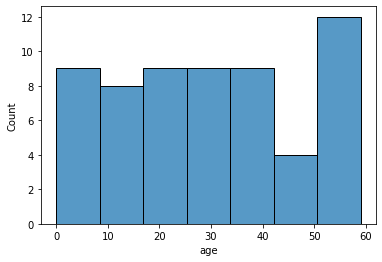

In [24]:
sns.histplot(df["age"])

<AxesSubplot:xlabel='age'>

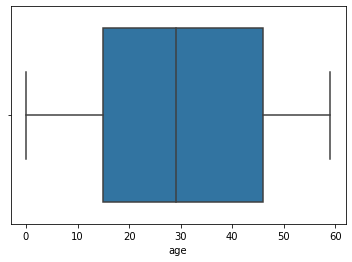

In [26]:
sns.boxplot(x = df['age'])

Removing outliers in age as person with age < 17 does not have a stable earning

In [30]:
df = df[df.age > 17]

<AxesSubplot:xlabel='age', ylabel='Count'>

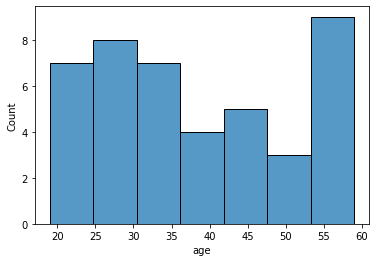

In [31]:
sns.histplot(data = df["age"])

<AxesSubplot:xlabel='age', ylabel='annual income (lakhs)'>

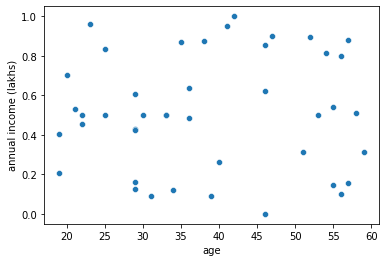

In [283]:
sns.scatterplot(data = df, x = df.age, y = df['annual income (lakhs)'])

Question 3

In [32]:
df1 = pd.read_csv('association_analysis.csv')

In [33]:
df1.head()

,tid,onion,tomato,potato,bottleguard,beans
0,1,1,0,1,0,0
1,2,1,0,0,1,1
2,3,0,0,1,0,0
3,4,0,1,1,1,1
4,5,1,1,1,0,0


In [44]:
df1.drop(['tid'], axis = 1, inplace = True)

In [45]:
!pip install apyori

You should consider upgrading via the 'c:\users\nimish bongale\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [46]:
from apyori import apriori

Converting dataframe to a list of lists containing items

In [47]:
records = []
for i in range(len(df1)):
    record = []
    for j in range(len(df1.columns)):
        if df1.values[i, j]:
            record.append(df1.columns[j])
    records.append(record)

In [48]:
records[:3]

[['onion', 'potato'], ['onion', 'bottleguard', 'beans'], ['potato']]

In [49]:
min_sup = 0.03
min_confidence = 0.7

Apriori

In [50]:
rules = apriori(records, min_support = min_sup, min_confidence = min_confidence)

In [51]:
rules = list(rules)

In [52]:
rules[0]

RelationRecord(items=frozenset({'beans', 'bottleguard', 'tomato'}), support=0.19607843137254902, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beans', 'bottleguard'}), items_add=frozenset({'tomato'}), confidence=0.7692307692307693, lift=1.3527851458885942), OrderedStatistic(items_base=frozenset({'bottleguard', 'tomato'}), items_add=frozenset({'beans'}), confidence=0.7142857142857142, lift=1.457142857142857)])

In [53]:
for rule in rules:
    print("Rule : ",rule[0], "Support :", rule[1], "Confidence : ", rule[2][0][2])

Rule :  frozenset({'beans', 'bottleguard', 'tomato'}) Support : 0.19607843137254902 Confidence :  0.7692307692307693
Rule :  frozenset({'beans', 'potato', 'tomato'}) Support : 0.1568627450980392 Confidence :  0.7272727272727272
Rule :  frozenset({'beans', 'potato', 'bottleguard', 'tomato'}) Support : 0.09803921568627451 Confidence :  0.8333333333333334
Rule :  frozenset({'beans', 'potato', 'onion', 'tomato'}) Support : 0.09803921568627451 Confidence :  0.7142857142857142
Rule :  frozenset({'onion', 'potato', 'bottleguard', 'tomato'}) Support : 0.09803921568627451 Confidence :  0.7142857142857142
Rule :  frozenset({'onion', 'bottleguard', 'potato', 'beans', 'tomato'}) Support : 0.058823529411764705 Confidence :  0.75


Question 4

FP Growth

In [54]:
!pip install pyfpgrowth

You should consider upgrading via the 'c:\users\nimish bongale\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.



Using legacy 'setup.py install' for pyfpgrowth, since package 'wheel' is not installed.
    Running setup.py install for pyfpgrowth: started
    Running setup.py install for pyfpgrowth: finished with status 'done'


In [56]:
import pyfpgrowth

itemsets = pyfpgrowth.find_frequent_patterns(records, 0.03)

In [57]:
itemsets

{('beans', 'bottleguard', 'onion'): 6,
 ('beans', 'bottleguard', 'onion', 'potato'): 4,
 ('bottleguard', 'onion', 'tomato'): 6,
 ('bottleguard', 'onion', 'potato', 'tomato'): 5,
 ('beans', 'bottleguard', 'onion', 'tomato'): 3,
 ('beans', 'bottleguard', 'onion', 'potato', 'tomato'): 3,
 ('bottleguard', 'onion', 'potato'): 7,
 ('beans', 'bottleguard', 'potato'): 6,
 ('beans', 'bottleguard', 'potato', 'tomato'): 5,
 ('bottleguard', 'potato', 'tomato'): 8,
 ('beans', 'bottleguard'): 13,
 ('beans', 'bottleguard', 'tomato'): 10,
 ('bottleguard', 'tomato'): 14,
 ('beans', 'onion', 'potato'): 7,
 ('beans', 'onion', 'potato', 'tomato'): 5,
 ('beans', 'potato', 'tomato'): 8,
 ('beans', 'onion'): 13,
 ('beans', 'onion', 'tomato'): 7,
 ('beans', 'tomato'): 16,
 ('onion',): 26,
 ('onion', 'tomato'): 15,
 ('onion', 'potato'): 14,
 ('onion', 'potato', 'tomato'): 9,
 ('potato', 'tomato'): 15,
 ('tomato',): 29}

In [301]:
pyfpgrowth.generate_association_rules(itemsets, 0.7)

{('bottleguard', 'onion', 'potato'): (('tomato',), 0.7142857142857143),
 ('bottleguard', 'onion', 'tomato'): (('potato',), 0.8333333333333334),
 ('beans', 'bottleguard', 'onion', 'potato'): (('tomato',), 0.75),
 ('beans', 'bottleguard', 'onion', 'tomato'): (('potato',), 1.0),
 ('beans', 'bottleguard', 'potato'): (('tomato',), 0.8333333333333334),
 ('beans', 'bottleguard'): (('tomato',), 0.7692307692307693),
 ('bottleguard', 'tomato'): (('beans',), 0.7142857142857143),
 ('beans', 'onion', 'potato'): (('tomato',), 0.7142857142857143),
 ('beans', 'onion', 'tomato'): (('potato',), 0.7142857142857143)}

Question 5 (Finding purchase type based on age, gender, income) 

In [62]:
from sklearn.model_selection import train_test_split

70-30 dataset split

In [63]:
features = df[['age', 'gender', 'annual income (lakhs)']]
target = df['purchase type ']

x_train, x_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.3)

In [64]:
from sklearn.tree import DecisionTreeClassifier

classifierDT = DecisionTreeClassifier()
classifierDT.fit(x_train, y_train)
predicted_labels = classifierDT.predict(x_test)
classifierDT.score(x_test, y_test)

0.46153846153846156

Confusion Matrix
[[4 3]
 [4 2]]
              precision    recall  f1-score   support

           0       0.50      0.57      0.53         7
           1       0.40      0.33      0.36         6

    accuracy                           0.46        13
   macro avg       0.45      0.45      0.45        13
weighted avg       0.45      0.46      0.46        13

Area under the curve: 0.45238095238095233


[]

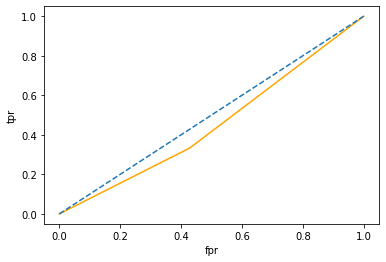

In [65]:
from sklearn import metrics

print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, predicted_labels))
print(metrics.classification_report(y_test, predicted_labels))
probability = classifierDT.predict_proba(x_test)[:, 1]
print("Area under the curve:", metrics.roc_auc_score(y_test, probability))
fpr, tpr, threshold = metrics.roc_curve(y_test, probability)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot(fpr, tpr, color = 'orange')
plt.plot([0,1], [0, 1], linestyle='--')
plt.plot()

In [66]:
from sklearn.naive_bayes import GaussianNB

classifierNB = GaussianNB()
classifierNB.fit(x_train, y_train)
predicted_labels = classifierNB.predict(x_test)
classifierNB.score(x_test, y_test)

0.46153846153846156

Confusion Matrix
[[5 2]
 [5 1]]
              precision    recall  f1-score   support

           0       0.50      0.71      0.59         7
           1       0.33      0.17      0.22         6

    accuracy                           0.46        13
   macro avg       0.42      0.44      0.41        13
weighted avg       0.42      0.46      0.42        13

Area under the curve: 0.5238095238095238


[]

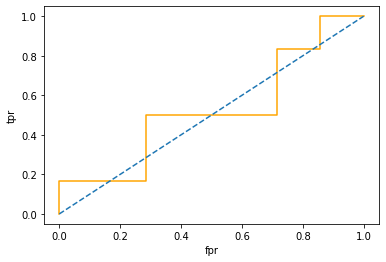

In [67]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, predicted_labels))
print(metrics.classification_report(y_test, predicted_labels))
probability = classifierNB.predict_proba(x_test)[:, 1]
print("Area under the curve:", metrics.roc_auc_score(y_test, probability))
fpr, tpr, threshold = metrics.roc_curve(y_test, probability)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot(fpr, tpr, color = 'orange')
plt.plot([0,1], [0, 1], linestyle='--')
plt.plot()

Question 6 

Bagging

In [68]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(random_state = 0)
bag.fit(x_train, y_train)
predicted = bag.predict(x_test)
probability = bag.predict_proba(x_test)[:, 1]
bag.score(x_test, y_test)

0.38461538461538464

              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.33      0.33      0.33         6

    accuracy                           0.38        13
   macro avg       0.38      0.38      0.38        13
weighted avg       0.38      0.38      0.38        13


Confusion matrix :
 [[3 4]
 [4 2]]

Area under the curve:  0.38095238095238093


Text(0, 0.5, 'tpr')

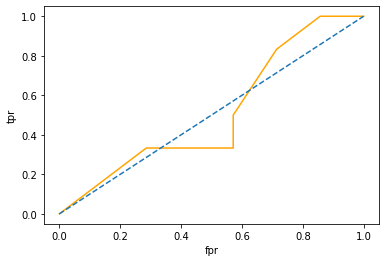

In [69]:
print(metrics.classification_report(y_test, predicted))
print("\nConfusion matrix :\n", metrics.confusion_matrix(y_test, predicted))
print("\nArea under the curve: ", metrics.roc_auc_score(y_test, predicted))
fpr, tpr, thresholds = metrics.roc_curve(y_test, probability)
plt.plot(fpr, tpr, color = 'orange')
plt.plot([0,1], [0,1], linestyle = '--')
plt.xlabel('fpr')
plt.ylabel('tpr')

Boosting (AdaBoost)

In [70]:
from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier(random_state = 0)
boost.fit(x_train, y_train)
probability = boost.predict_proba(x_test)[:, 1]
predicted = boost.predict(x_test)
boost.score(x_test, y_test)

0.38461538461538464

              precision    recall  f1-score   support

           0       0.44      0.57      0.50         7
           1       0.25      0.17      0.20         6

    accuracy                           0.38        13
   macro avg       0.35      0.37      0.35        13
weighted avg       0.35      0.38      0.36        13

Confusion matrix
 [[4 3]
 [5 1]]
Area under the curve 0.369047619047619


Text(0, 0.5, 'tpr')

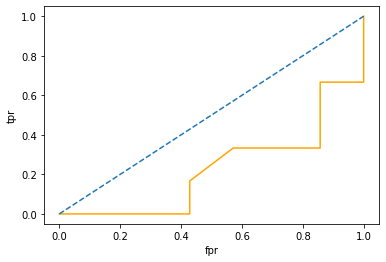

In [71]:
print(metrics.classification_report(y_test, predicted))
print("Confusion matrix\n", metrics.confusion_matrix(y_test, predicted))
print("Area under the curve", metrics.roc_auc_score(y_test, predicted))
fpr, tpr, thresholds = metrics.roc_curve(y_test, probability)
plt.plot(fpr, tpr, color = 'orange')
plt.plot([0,1], [0,1], linestyle = '--')
plt.xlabel('fpr')
plt.ylabel('tpr')

Question 7 (K Means Clustering)

Grouping people based on gender, age, category

In [73]:
from sklearn.cluster import KMeans

dataframe = df[['gender', 'age', 'category']]

kmeans = KMeans(n_clusters = 5, random_state = 0)
kmeans.fit_predict(dataframe)
print("Cluster centers\n", kmeans.cluster_centers_)
dataframe['cluster'] = kmeans.labels_

Cluster centers
 [[ 0.5        53.66666667 13.83333333]
 [ 0.8        23.7         4.7       ]
 [ 0.75       29.         14.5       ]
 [ 0.71428571 55.28571429  2.28571429]
 [ 0.5        39.91666667  2.91666667]]


<ipython-input-73-c9f73c7f8cb5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['cluster'] = kmeans.labels_


In [74]:
dataframe.head()

,gender,age,category,cluster
0,0,29.0,1,1
1,1,53.0,2,3
2,1,22.0,5,1
4,1,55.0,12,0
5,0,52.0,15,0


<AxesSubplot:xlabel='cluster', ylabel='age'>

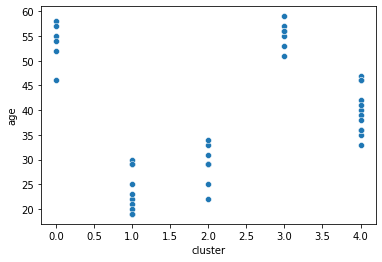

In [75]:
sns.scatterplot(data = dataframe, x = dataframe.cluster, y = dataframe.age)

<AxesSubplot:xlabel='cluster', ylabel='gender'>

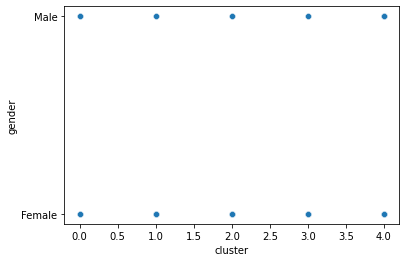

In [76]:
sns.scatterplot(data = dataframe, x = dataframe.cluster, y = dataframe.gender.replace({0 : "Male", 1 : "Female"}))

<AxesSubplot:xlabel='cluster', ylabel='category'>

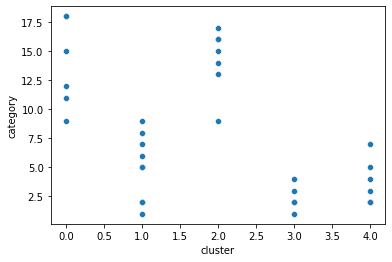

In [77]:
sns.scatterplot(data = dataframe, x = dataframe.cluster, y = dataframe.category)

Question 8 

Grouping people based on gender, age, category

Hierarchical Clustering (Agglomerative clustering)

In [81]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean')
agg.fit_predict(dataframe)

array([1, 4, 1, 2, 2, 1, 1, 2, 3, 3, 2, 4, 3, 0, 4, 1, 0, 0, 4, 0, 1, 4,
       0, 2, 3, 3, 4, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 3, 0, 3, 1, 4],
      dtype=int64)

In [82]:
dataframe['cluster'] = cluster.labels_

NameError: name 'cluster' is not defined

In [ ]:
dataframe.head()

In [ ]:
sns.scatterplot(data = dataframe, x = dataframe.cluster, y = dataframe.age)

In [ ]:
sns.scatterplot(data = dataframe, x = dataframe.cluster, y = dataframe.gender.replace({0 : "Male", 1 : "Female"}))

In [ ]:
sns.scatterplot(data = dataframe, x = dataframe.cluster, y = dataframe.category)